![alt text]({64C39F2E-D321-43BE-B082-C490FC7A8483}.png)


In [2]:
import timeit
import sys
import timeit
import matplotlib.pyplot as plt

In [5]:
# 1. Multiplicação repetida com laço for
def mult_repetida(x, n):
    resultado = 1.0
    for _ in range(n):
        resultado *= x
    return resultado

# 2. Uso do operador **
def operator_power(x, n):
    return x ** n

# 3. Exponenciação rápida recursiva (n >= 1)
def fast_exp(x, n):
    if n == 1:
        return x
    if n % 2 == 0:
        half = fast_exp(x, n // 2)
        return half * half
    else:
        return x * fast_exp(x, n - 1)

# Função para medição de tempo com timeit
def medir_tempo(funcao, x, n):
    setup = f"from __main__ import {funcao.__name__}"
    stmt = f"{funcao.__name__}({x}, {n})"
    tempo = timeit.timeit(stmt, setup=setup, number=1)
    return tempo, funcao(x, n)

# Valores de teste
x = 1.000001
ns = [100, 10000, 1000000, 100000000]

# Dados para armazenar resultados
resultados = {
    "Multiplicação Repetida": {"tempos": [], "valores": []},
    "Operador **": {"tempos": [], "valores": []},
    "Exponenciação Rápida": {"tempos": [], "valores": []}
}

# Executar medições
for n in ns:
    print(f"\n--- n = {n} ---")

    # Multiplicação repetida
    t, val = medir_tempo(mult_repetida, x, n)
    resultados["Multiplicação Repetida"]["tempos"].append(t)
    resultados["Multiplicação Repetida"]["valores"].append(val)
    print(f"Mult. Repetida: {val:.8f} | Tempo: {t:.6f} s")

    # Operador **
    t, val = medir_tempo(operator_power, x, n)
    resultados["Operador **"]["tempos"].append(t)
    resultados["Operador **"]["valores"].append(val)
    print(f"Operador **:    {val:.8f} | Tempo: {t:.6f} s")

    # Exponenciação rápida
    t, val = medir_tempo(fast_exp, x, n)
    resultados["Exponenciação Rápida"]["tempos"].append(t)
    resultados["Exponenciação Rápida"]["valores"].append(val)
    print(f"Exp. Rápida:    {val:.8f} | Tempo: {t:.6f} s")



--- n = 100 ---
Mult. Repetida: 1.00010000 | Tempo: 0.000008 s
Operador **:    1.00010000 | Tempo: 0.000003 s
Exp. Rápida:    1.00010000 | Tempo: 0.000005 s

--- n = 10000 ---
Mult. Repetida: 1.01005016 | Tempo: 0.000466 s
Operador **:    1.01005016 | Tempo: 0.000002 s
Exp. Rápida:    1.01005016 | Tempo: 0.000006 s

--- n = 1000000 ---
Mult. Repetida: 2.71828047 | Tempo: 0.049427 s
Operador **:    2.71828047 | Tempo: 0.000003 s
Exp. Rápida:    2.71828047 | Tempo: 0.000007 s

--- n = 100000000 ---
Mult. Repetida: 26879827172977655387289053805002455219437568.00000000 | Tempo: 5.226021 s
Operador **:    26879827172956263783410202433852198352846848.00000000 | Tempo: 0.000002 s
Exp. Rápida:    26879827129632417899990591718163420043804672.00000000 | Tempo: 0.000008 s


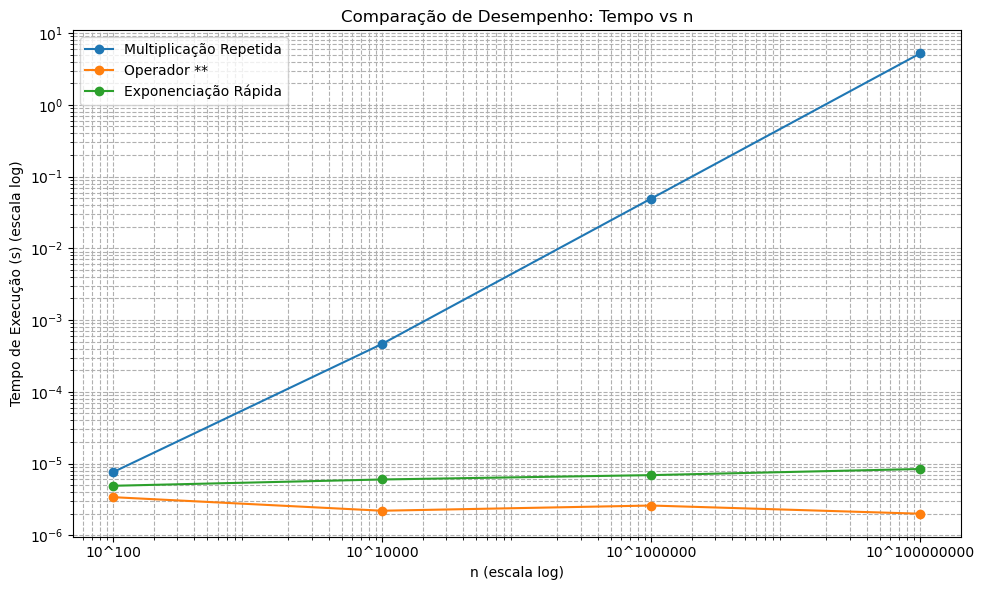

In [6]:
# Gráfico comparativo log-log
plt.figure(figsize=(10, 6))

for metodo, dados in resultados.items():
    plt.loglog(ns, dados["tempos"], 'o-', label=metodo)

plt.title('Comparação de Desempenho: Tempo vs n')
plt.xlabel('n (escala log)')
plt.ylabel('Tempo de Execução (s) (escala log)')
plt.grid(True, which="both", linestyle='--')
plt.legend()
plt.xticks(ns, [f'10^{int(i)}' for i in map(lambda x: x, ns)])
plt.tight_layout()
plt.show()


In [7]:
def fast_exp_neg(x, n):
    if n == 0:
        return 1.0
    if n < 0:
        return 1.0 / fast_exp_neg(x, -n)
    if n == 1:
        return x
    if n % 2 == 0:
        half = fast_exp_neg(x, n // 2)
        return half * half
    else:
        return x * fast_exp_neg(x, n - 1)

# Teste com expoente negativo
x_test = 0.9999
n_test = -10000

print("\n--- Teste com Expoente Negativo ---")
t_fast, val_fast = medir_tempo(fast_exp_neg, x_test, n_test)
t_op, val_op = medir_tempo(operator_power, x_test, n_test)

print(f"Exp. Rápida: {val_fast}")
print(f"Operador **: {val_op}")
print(f"Diferença Absoluta: {abs(val_fast - val_op):.3e}")
print(f"Tempo Exp. Rápida: {t_fast:.6f} s")
print(f"Tempo Operador **: {t_op:.6f} s")


--- Teste com Expoente Negativo ---
Exp. Rápida: 2.7184177550099013
Operador **: 2.71841775501015
Diferença Absoluta: 2.487e-13
Tempo Exp. Rápida: 0.000008 s
Tempo Operador **: 0.000002 s
